<img src=https://scikit-learn.org/stable/_static/ml_map.png>

# 목차
1. Data Load
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석
    - 통계적 데이터 분포 확인
    - 차트 시각화
3. Feature Engineering : 전처리(preprocessing), 가공(Engineering)
    - 타입변환 (날짜, 카테고리변환(ABC->123)
    - 결측처리 (삭제:drona, 보간(대체):fillna, 모델 활용)
    - 바이닝(범주화 : cut, quct)
    - 인코딩(라벨인코딩, 원핫인코딩 , 더미)
    - 정규화(스케일링 : MinMaxScaler, StandardScaler, RobustScaler, log)
    - 이상치(Outlier)
4. 모델 선정(Model Selection : pycaret)
    - 회귀(Regression)
    - 분류(Classification)
    - 군집(Clustering, PCA)
5. 모델 학습 및 예측(train_test_split & fit & predict)
6. 모델 검증 및 평가 (Validation & Evaluation metrics)
7. 하이퍼파미터 튜닝(Hyper-parameter optimization)
8. 모델 저장 및 배포(Model Save & Deployment)

In [212]:
import warnings
warnings.filterwarnings(action='ignore')
import re
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.figsize'] = [6.4, 4.8]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 결측

In [2]:
df = pd.DataFrame({"name":['kim',np.nan,None,"allen","king"],"score": ["A",np.nan,"B",np.nan,"C"]})
df

,name,score
0,kim,A
1,NaN,NaN
2,None,B
3,allen,NaN
4,king,C


In [3]:
np.nan == np.nan

False

In [4]:
np.nan in [np.nan, np.nan]

True

In [5]:
type(np.nan)

float

In [6]:
None == None

True

In [7]:
None is None

True

In [8]:
np.nan is np.nan

True

In [9]:
None is np.nan

False

## 확인
```
df.isna()
df.isnull()
df.notna()
df.notnull()
```

In [10]:
df.isna()

,name,score
0,False,False
1,True,True
2,True,False
3,False,True
4,False,False


In [11]:
df[df['name'].isna()]

,name,score
1,NaN,NaN
2,None,B


In [12]:
df[df['name'].notna()]

,name,score
0,kim,A
3,allen,NaN
4,king,C


In [13]:
df[df['score'].isna()]

,name,score
1,NaN,NaN
3,allen,NaN


In [14]:
df[df['score'].notna()]

,name,score
0,kim,A
2,None,B
4,king,C


In [15]:
df.isna().sum()[df.isna().sum()>0]

name     2
score    2
dtype: int64

## 삭제
```
DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False)
    axis{0 or ‘index’, 1 or ‘columns’}, default 0
    how{‘any’, ‘all’}, default ‘any’ # all: 행 또는 열이 '모두' 결측일때
```

In [16]:
df = pd.DataFrame({"name":['kim',np.nan,None,"allen","king"],"score": ["A",np.nan,"B",np.nan,"C"]})
df

,name,score
0,kim,A
1,NaN,NaN
2,None,B
3,allen,NaN
4,king,C


In [17]:
df.dropna(axis=0)

,name,score
0,kim,A
4,king,C


In [18]:
df.dropna(axis=1)

""
0
1
2
3
4


In [19]:
df.dropna(axis=0, how='all')

,name,score
0,kim,A
2,None,B
3,allen,NaN
4,king,C


## 보간

### 위에 값으로 채우기
```
DataFrame.ffill(*, axis=None, inplace=False, limit=None, downcast=None)
```

In [20]:
df.fillna(method='ffill')

,name,score
0,kim,A
1,kim,A
2,kim,B
3,allen,B
4,king,C


In [21]:
df.ffill()

,name,score
0,kim,A
1,kim,A
2,kim,B
3,allen,B
4,king,C


### 밑에 값으로 채우기
```
DataFrame.bfill(*, axis=None, inplace=False, limit=None, downcast=None)
```

In [22]:
df.fillna(method='bfill')

,name,score
0,kim,A
1,allen,B
2,allen,B
3,allen,C
4,king,C


In [23]:
df.bfill()

,name,score
0,kim,A
1,allen,B
2,allen,B
3,allen,C
4,king,C


### 지정 값으로 채우기
```
DataFrame.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=None)
    method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
```

In [24]:
df = pd.DataFrame({"name":['kim',np.nan,None,"allen","king"],"score": ["A",np.nan,"B",np.nan,"C"]})
df

,name,score
0,kim,A
1,NaN,NaN
2,None,B
3,allen,NaN
4,king,C


In [25]:
df.fillna('■●★▲♠♥')

,name,score
0,kim,A
1,■●★▲♠♥,■●★▲♠♥
2,■●★▲♠♥,B
3,allen,■●★▲♠♥
4,king,C


### 딕셔너리로 채우기

In [26]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B",'B',"A","A"],"sal": [1000,1000,3000,np.nan,4000]})
df

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,NaN
4,king,A,4000.0


In [27]:
# name: aaa
# scor: F
# sal: 999
df.fillna({'name':'AAA', 'score':'F', 'sal':9999})

,name,score,sal
0,smith,A,1000.0
1,AAA,B,1000.0
2,jones,B,3000.0
3,allen,A,9999.0
4,king,A,4000.0


### 통계값으로 채우기

In [28]:
df['sal'].mean(), df['sal'].median(), df['sal'].mode().values[0]

(2250.0, 2000.0, 1000.0)

In [29]:
# sal의 결측치를 sal의 평균값으로
dfcp = df.copy()
dfcp['sal'] = dfcp['sal'].fillna(dfcp['sal'].mean())
dfcp

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,2250.0
4,king,A,4000.0


### 다른컬럼의 통계값으로 채우기

In [30]:
dfcp.groupby('score')['sal'].transform(lambda g: g.fillna( g.mean() ))

0    1000.0
1    1000.0
2    3000.0
3    2250.0
4    4000.0
Name: sal, dtype: float64

In [31]:
# sal의 결측치를 score 그룹바이 평균값
dfcp = df.copy()
mean_sal_by_score = dfcp.groupby('score')['sal'].transform('mean')
dfcp['sal'] = dfcp['sal'].fillna(  mean_sal_by_score  )
dfcp

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,2500.0
4,king,A,4000.0


### 모델 예측 값

# 타입

## 글자<-->날짜

In [32]:
str_val = '2022-01-01'
dt = datetime.strptime(str_val, '%Y-%m-%d')
dt

datetime.datetime(2022, 1, 1, 0, 0)

In [33]:
dt.strftime('%Y-%m-%d')

'2022-01-01'

In [34]:
pd.date_range('2022-01-01', '2022-02-10', freq='MS')

DatetimeIndex(['2022-01-01', '2022-02-01'], dtype='datetime64[ns]', freq='MS')

In [63]:
df = pd.DataFrame({'sdate':'1999-01-01', 'regdate':pd.date_range('2022-01-01', '2022-01-06', freq='d')})

df['sdate2'] = df['sdate'].astype('datetime64')
df['sdate3'] = pd.to_datetime(df['sdate'])

df['yy'] = df['regdate'].dt.year
df['mm'] = df['regdate'].dt.month
df['dd'] = df['regdate'].dt.day

df['hour'] = df['regdate'].dt.hour
df['minute'] = df['regdate'].dt.minute
df['second'] = df['regdate'].dt.second

df['dayofweek'] = df['regdate'].dt.dayofweek
df

,sdate,regdate,sdate2,sdate3,yy,mm,dd,hour,minute,second,dayofweek
0,1999-01-01,2022-01-01,1999-01-01,1999-01-01,2022,1,1,0,0,0,5
1,1999-01-01,2022-01-02,1999-01-01,1999-01-01,2022,1,2,0,0,0,6
2,1999-01-01,2022-01-03,1999-01-01,1999-01-01,2022,1,3,0,0,0,0
3,1999-01-01,2022-01-04,1999-01-01,1999-01-01,2022,1,4,0,0,0,1
4,1999-01-01,2022-01-05,1999-01-01,1999-01-01,2022,1,5,0,0,0,2
5,1999-01-01,2022-01-06,1999-01-01,1999-01-01,2022,1,6,0,0,0,3


# 인코딩

In [36]:
dfcp

,name,score,sal
0,smith,A,1000.0
1,NaN,B,1000.0
2,jones,B,3000.0
3,allen,A,2500.0
4,king,A,4000.0


## 오브젝트를 숫자로

### 라벨인코더

In [37]:
le = LabelEncoder()
le.fit(dfcp['name'])
res_arr = le.transform(dfcp['name'])
dfcp['name_le'] = res_arr
dfcp

,name,score,sal,name_le
0,smith,A,1000.0,3
1,NaN,B,1000.0,4
2,jones,B,3000.0,1
3,allen,A,2500.0,0
4,king,A,4000.0,2


### 원핫인코더

In [38]:
dfcp['score'].values.reshape(-1,1)

array([['A'],
       ['B'],
       ['B'],
       ['A'],
       ['A']], dtype=object)

In [39]:
name_value_matrix = dfcp['score'].values.reshape(-1,1)

ohe = OneHotEncoder(sparse=False)
ohe.fit(name_value_matrix)
res_matrix = ohe.transform(name_value_matrix)
res_matrix

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [40]:
ohe = OneHotEncoder()
ohe.fit(dfcp[['score']])
res_sparse_matrix = ohe.transform(dfcp[['score']])
res_matrix = res_sparse_matrix.toarray()
res_matrix

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [41]:
ohe.categories_[0]

array(['A', 'B'], dtype=object)

In [42]:
dfcp[ohe.categories_[0]] = res_matrix.astype('uint8')
dfcp

,name,score,sal,name_le,A,B
0,smith,A,1000.0,3,1,0
1,NaN,B,1000.0,4,0,1
2,jones,B,3000.0,1,0,1
3,allen,A,2500.0,0,1,0
4,king,A,4000.0,2,1,0


### 겟더미
```
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
```

In [43]:
get_dummies_name_df = pd.get_dummies(dfcp['name'])
get_dummies_name_df

,allen,jones,king,smith
0,0,0,0,1
1,0,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [44]:
pd.concat([dfcp,get_dummies_name_df],axis=1)

,name,score,sal,name_le,A,B,allen,jones,king,smith
0,smith,A,1000.0,3,1,0,0,0,0,1
1,NaN,B,1000.0,4,0,1,0,0,0,0
2,jones,B,3000.0,1,0,1,0,1,0,0
3,allen,A,2500.0,0,1,0,1,0,0,0
4,king,A,4000.0,2,1,0,0,0,1,0


#### ★겟더미강추

In [45]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B",'B',"A","A"],"sal": [1000,1000,3000,np.nan,4000]})

pd.get_dummies(df, columns=['name', 'score'])

,sal,name_allen,name_jones,name_king,name_smith,score_A,score_B
0,1000.0,0,0,0,1,1,0
1,1000.0,0,0,0,0,0,1
2,3000.0,0,1,0,0,0,1
3,NaN,1,0,0,0,1,0
4,4000.0,0,0,1,0,1,0


# 바이닝

In [46]:
df = pd.DataFrame({"name":["smith",np.nan,"jones","allen","king"],"score": ["A","B","B","A","A"],"sal": [1000,1000,3000,2000,4000]})
df

,name,score,sal
0,smith,A,1000
1,NaN,B,1000
2,jones,B,3000
3,allen,A,2000
4,king,A,4000


In [47]:
df['월급컷'] = pd.cut(df['sal'], 3, labels=['소','중','대'])
df

,name,score,sal,월급컷
0,smith,A,1000,소
1,NaN,B,1000,소
2,jones,B,3000,중
3,allen,A,2000,소
4,king,A,4000,대


# 스케일링
```
StandardScaler(), MinMaxScaler(), RobustScaler()
```

http://piramvill2.org/?p=3748

http://www.ktword.co.kr/test/view/view.php?m_temp1=1881

<img src="https://blog.kakaocdn.net/dn/dkb2Mh/btq5zGCTDyH/JXWmnsKNOjkXci3PIFk9K0/img.png">

<img src="http://www.ktword.co.kr/img_data/1881_6.JPG">

절편: -10.800000000000004
기울기: 10.090909090909092
결정계수: 0.9979308654187784
44.7
44.7
0.9979308654187784


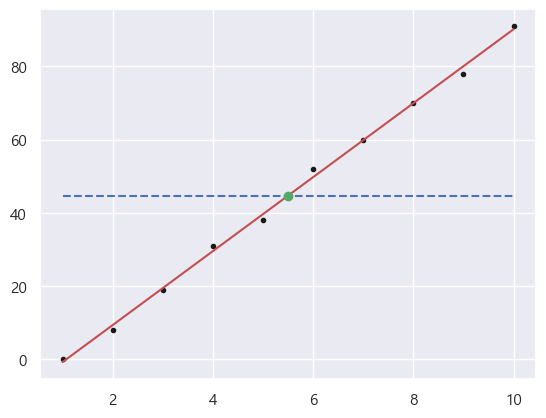

In [279]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,8,19,31,38,52,60,70,78,91])

plt.plot(x, y, 'k.')

plt.plot(x, [y.mean()]*y.size, 'b--')

b1 = ((x - x.mean())*(y - y.mean())).sum() / ((x - x.mean())**2).sum()
b0 = y.mean() - b1*(x.mean())
X = x
Y = b0 + b1*X
plt.plot(X, Y, 'r-')
print('절편:', b0)
print('기울기:', b1)

SST = ((y-y.mean())**2).sum()
SSE = ((y-Y)**2).sum()
SSR = ((Y-y.mean())**2).sum()

R_squared = 1-SSE/SST
print('결정계수:', R_squared)

x_ = np.median(x)
print(b0 + b1*x_)
plt.plot(x_, b0 + b1*x_, 'go')

reg = LinearRegression()
reg.fit(x.reshape(-1,1), y)
print(reg.predict([[x_]])[0])
print(reg.score(x.reshape(-1,1),y))

plt.show()



* 설명가능한 에러
    * $SSE = \sum_{i=1}^n ( \hat{Y_i} - \bar{Y})^2 $
    * SSE(<b>Explained</b>   sum of squares)
    * SSR(Regression sum of Squares)
<br><br>

* 설명 불가능한 에러 : <b>잔차</b>제곱합
    * 잔차(Residual): 실제값 - 예측값
    * $SSR = \sum_{i=1}^n ( {Y} - \hat{Y_i} )^2 $
    * SSR(<b>Residual</b>    sum of squares)
    * SSE(Error         sum of squares)
<br><br>

* SST(total sum of squares)  : <b>편차</b>제곱합  
    * $\sum_{i=1}^n ( Y_i - \bar{Y})^2 $ 
<br><br>


* $SST = SSR + SSE$

* R-squared (R제곱;결정계수) : 총 에러 중 설명가능한 에러의 비율
    * $R^2 = SSE / SST $
    * $R^2 = 1 - (SSR / SST) $

In [ ]:
df = pd.DataFrame({"score": ["A","B","B","A","C"], "le_score":[0,1,1,0,2]})
df.describe()

,le_score
count,5.00000
mean,0.80000
std,0.83666
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,2.00000


In [49]:
df['le_score'].mean(), df['le_score'].std(), np.std(df['le_score']), np.std(df['le_score'], ddof=1)

(0.8, 0.8366600265340756, 0.7483314773547883, 0.8366600265340756)

In [50]:
(df['le_score'][0]-df['le_score'].mean()) / np.std(df['le_score'])

-1.0690449676496976

In [60]:
sc_list = [
    ('Standard', StandardScaler()),
    ('MinMax', MinMaxScaler()),
    ('Robust', RobustScaler())
]

X = df[['le_score']]
res_df = X
for sc_tup in sc_list:
    sc = sc_tup[1]
    sc.fit(X)
    res = sc.transform(X)
    res_df[sc_tup[0]] = res.T[0]
    
res_df

,le_score,Standard,MinMax,Robust
0,0,-1.069045,0.0,-1.0
1,1,0.267261,0.5,0.0
2,1,0.267261,0.5,0.0
3,0,-1.069045,0.0,-1.0
4,2,1.603567,1.0,1.0


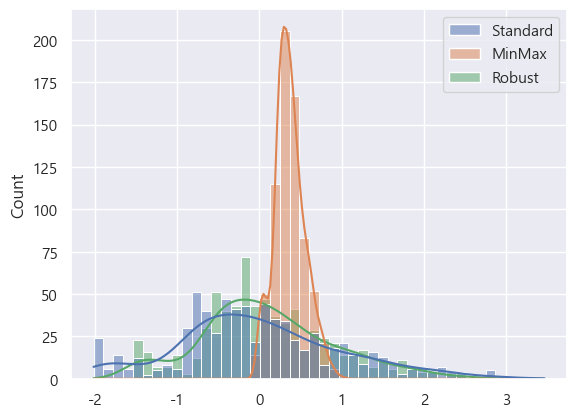

In [52]:
sc_list = [
    ('Standard', StandardScaler()),
    ('MinMax', MinMaxScaler()),
    ('Robust', RobustScaler())
]

X = pd.read_csv('../titanic/train.csv')[['Age']]
res_df = X
for sc_tup in sc_list:
    sc = sc_tup[1]
    sc.fit(X)
    res = sc.transform(X)
    res_df[sc_tup[0]] = res.T[0]
    
sns.histplot(res_df.drop('Age', axis=1), kde=True)
plt.show()